In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
def set_fontsize(ax, fs):
    """
    Small function to set font sizes for figures
    """
    ax.tick_params(axis='both', which='major', labelsize=fs)
    ax.tick_params(axis='both', which='minor', labelsize=fs)
    ax.xaxis.label.set_size(fs)
    ax.yaxis.label.set_size(fs)
    ax.yaxis.offsetText.set_fontsize(fs)
    ax.title.set_size(fs*1.1)

In [3]:
edm_results = np.array([-2.08, -3.82, 1.46, 1.37, -0.19, -1.27, 1.48, 0.01, -0.48, 0.56, 
               -1.9, 0.73, -0.71, 0.76, -0.08, -0.18, -0.97, 2.52, -1.93, -0.91, 
               2.25, 3.6, 0.2, 1.81, -1.2, 0.26, 0.41, 0.41])
edm_sigma = np.array([1.69, 1.66, 1.69, 1.21, 0.94, 1.26, 1.45, 1.33, 1.21, 1.06, 1.14, 1.45, 1.56, 1.14, 
             1.39, 1.14, 1.35, 0.99, 1.12, 1.56, 1.13, 1.64, 1.38, 1.54, 1.7, 1.81, 1.52, 1.6])

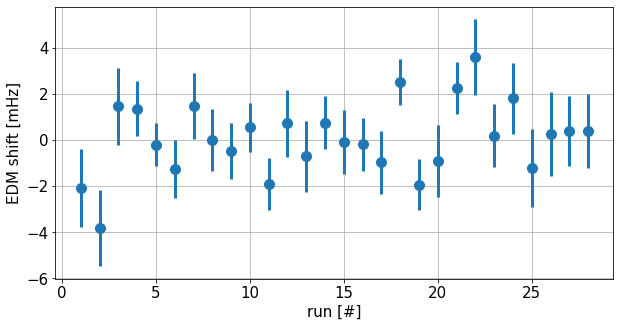

In [4]:
fig, ax = plt.subplots(figsize = (10,5))

ax.errorbar(np.arange(1,len(edm_results)+1, 1), edm_results, yerr = edm_sigma, fmt = '.', lw = 3, ms = 20)

ax.set_ylabel('EDM shift [mHz]')
ax.set_xlabel('run [#]')
ax.grid(True)

set_fontsize(ax,15)

## Weighted Average

$
    \bar x_{wtd} = \frac{\Sigma_{i=1}^n w_i x_i}{\Sigma_{i=1}^{n} w_i}
$  
$
    Var(x)_{wtd} = \sigma^2_{x,wtd} = \frac{\Sigma_{i=1}^n \left(x_i - \bar x_{wtd}\right)^2}{\Sigma_{i=1}^{n} w_i} \frac{n}{n-1}
$  
With the Central Limit Theorem  
$
    \sigma_{\bar x, wtd} = \frac{\sigma_{x,wtd}}{\sqrt{n}}
$

In [5]:
def weighted_mean_error(x, w):
    x_wtd = np.average(x, weights = w)
    n = len(x)
    var_wtd = np.sum(w*(x-x_wtd)**2)/np.sum(w) * n/(n-1)
    return np.sqrt(var_wtd/n)

In [6]:
mean = np.average(edm_results, weights = edm_sigma)+0.05
sigma = weighted_mean_error(edm_results, edm_sigma)

print('Weighted Average')
print(f'EDM = ({mean:.2f} +/- {sigma:.2f}) mHz')

Weighted Average
EDM = (0.10 +/- 0.31) mHz


In [7]:
mean = np.mean(edm_results)+0.05
sigma = np.sqrt(np.sum(edm_sigma**2))/len(edm_results)
print('Average')
print(f'EDM = ({mean:.2f} +/- {sigma:.2f}) mHz')

Average
EDM = (0.13 +/- 0.26) mHz


### Thesis Result
$\left(0.14\pm0.24\right)$ mHz

# Sensitivity SOF Region

$\delta S = \frac{\pi C_{res}}{\Delta F_0}\delta f$  
Shot-noise limited sensitivity  
$\delta f = \frac{\Delta F_0}{\pi C_{res}}\sqrt{\frac{DC}{T_D}}$  
$\Delta F = v/L$ : linewidth of SOF transition  
$DC = BG+SC+FOC$; $BG$: background rate; $SC$: scattering rate; $FOC$: focussed rate  

| variable | value |  
| ----------|----------|
| $C_{res}(JE)$ | $3.8\pm 0.2 \times 10^7$  molecules/s|
| $C_{res}(KH)$ | $3.0\pm 0.2\times 10^7$ molecules/s |
| $T_D$ | $1$ s |
| $BG$ | $7.5 \times 10^7$ ions/s |
| $SC$ | $4.4\times 10^8$ molecules/s | 
| $FOC$ | $4.4\times 10^8$ molecules/s |
| $v$ | $280$ m/s|
| $L$ | $2.15$ m |

In [8]:
dF0 = 290/2.15
BG = 7.5e7
SC = 4.4e8
FOC = 4.4e8
DC = BG+SC+FOC
Td = 1
Cres = 3e7
shot_noise = dF0/(np.pi*Cres) * np.sqrt(DC/Td)
print(f'shot noise : {shot_noise*1e3:.2f} mHz')

shot noise : 44.23 mHz


In [9]:
measurements = 4**4 * 8
print(f'run noise : {shot_noise/(np.sqrt(measurements))*1e3:.2f} mHz')

run noise : 0.98 mHz


In [10]:
measurements = 4**4 * 8 * 28
print(f'total noise : {shot_noise/(np.sqrt(measurements))*1e3:.2f} mHz')

total noise : 0.18 mHz


## CeNTREX

| variable | value |  
| ----------|----------|
| $C_{res}(JE)$ | $2\times 10^{9}$  molecules/s|
| $C_{res}(KH)$ | $2\times 10^{9}$ molecules/s |
| $T_D$ | $20$ ms |
| $BG$ | $0$ /s |
| $SC$ | $0$ molecules/s | 
| $FOC$ | $2\times 10^{9}$ molecules/s |
| $v$ | $180$ m/s|
| $L$ | $3$ m |

Here I'm assuming all SOF molecules are detected, using the naive counting approach to determine the shot noise & total noise.

In [11]:
dF0 = 180/3
Cres = 2e9
DC = Cres
pulse_rate = 50
Td = 1/pulse_rate
shot_noise = dF0/(np.pi*Cres) * np.sqrt(DC/Td)
print(f'shot noise : {shot_noise*1e3:.2f} mHz')

shot noise : 3.02 mHz


In [12]:
integration_time = 300*3600 # seconds
measurements = integration_time * pulse_rate
print(f'total noise : {shot_noise/(np.sqrt(measurements))*1e6:.2f} uHz')

total noise : 0.41 uHz


## Number of molecules/pulse

Data from beam characterization report

In [13]:
from scipy.constants import k as k_B
k_B = 1

def population(J, T, B=0.32, n = 100):
    g = lambda J: 4*(2*J+1)
    a = lambda J: -B*J*(J+1)/(k_B*T)
    Z = np.sum([g(i)*np.exp(a(i)) for i in range(n)])
    return g(J)*np.exp(a(J))/Z

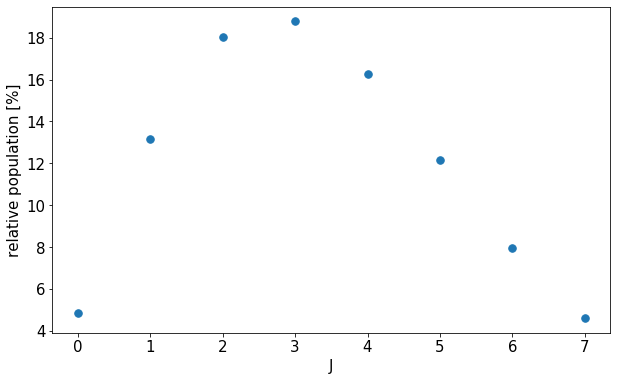

In [14]:
J = np.arange(0,8)

fig, ax = plt.subplots(figsize = (10,6))
ax.plot(J, population(J, 6.5)*100, '.', ms = 15)

ax.set_xlabel('J')
ax.set_ylabel('relative population [%]')

set_fontsize(ax,15)

population J=0 to J=3 : 6.43e+12 molecules/pulse/sr


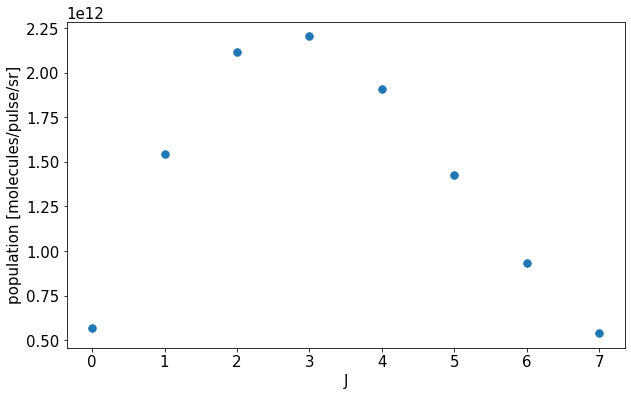

In [15]:
populations = population(J, 6.5)/(4*(2*J+1))
populations /= populations.max()
populations *= 1.42e11 * 4*(2*J+1)

cooling_population = np.sum(populations[:4])

fig, ax = plt.subplots(figsize = (10,6))
ax.plot(J, populations, '.', ms = 15)

ax.set_xlabel('J')
ax.set_ylabel('population [molecules/pulse/sr]')

set_fontsize(ax,15)

print(f'population J=0 to J=3 : {cooling_population:.2e} molecules/pulse/sr')

In [16]:
distance = 0.9 # m from source to electrostatic lens
area_lens = np.pi*(0.0254/2)**2 # approximate capture area of electrostatic lens
sr = area_lens / distance**2
print(f'capture angle electrostatic lens : {sr:.2e} sr')

capture angle electrostatic lens : 6.26e-04 sr


In [17]:
efficiency_rotational_transfer = 0.5
print(f'molecules focused : {sr*cooling_population*efficiency_rotational_transfer:.2e} molecules/pulse')

molecules focused : 2.01e+09 molecules/pulse


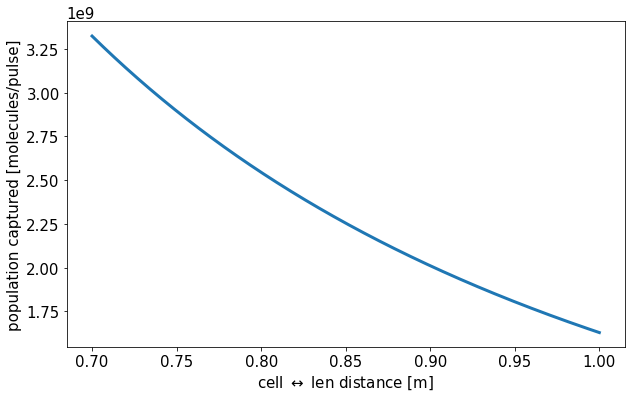

In [18]:
rot_transfer_pop = lambda r, r_lens: (np.pi*r_lens**2)/r**2 * efficiency_rotational_transfer * cooling_population

dis = np.linspace(0.7, 1, 501)

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(dis, rot_transfer_pop(dis, 0.0254/2), lw = 3)

ax.set_xlabel(r'cell $\leftrightarrow$ len distance [m]')
ax.set_ylabel('population captured [molecules/pulse]')
set_fontsize(ax, 15)

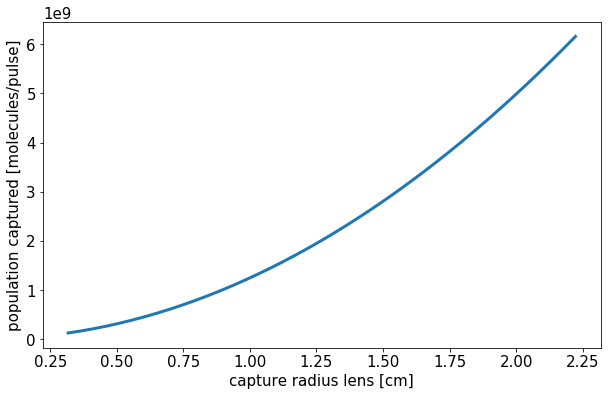

In [19]:
radii_lens = np.linspace(0.0254/8, 1.75*0.0254/2, 201)

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(radii_lens*1e2, rot_transfer_pop(0.9, radii_lens), lw = 3)

ax.set_xlabel('capture radius lens [cm]')
ax.set_ylabel('population captured [molecules/pulse]')
set_fontsize(ax, 15)

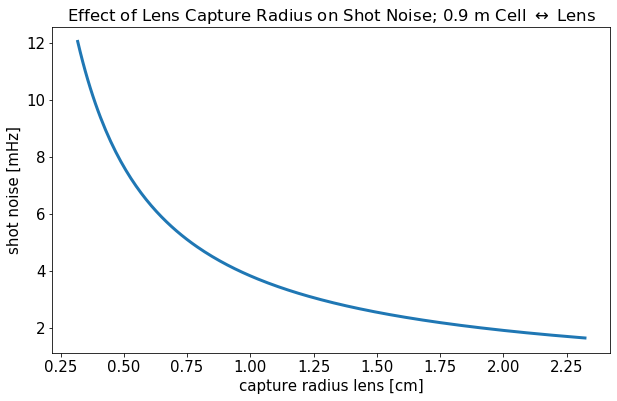

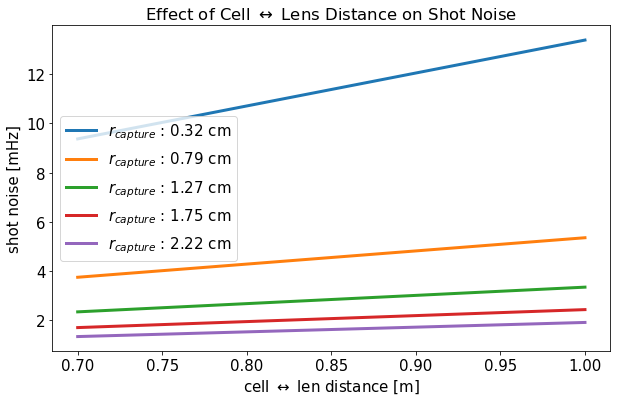

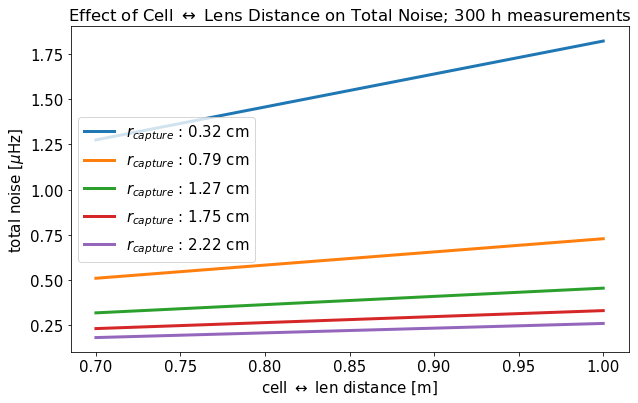

In [20]:
def shot_noise_func(dF0, Cres, Dc, Td):
    return dF0/(np.pi*Cres) * np.sqrt(Dc/Td)

def total_noise_func(dF0, Cres, Dc, Td, measurements):
    return shot_noise_func(dF0, Cres, Dc, Td)/np.sqrt(measurements)


dis = np.linspace(0.7, 1, 501)
radii_lens = np.linspace(0.0254/8, 1.75*0.0254/2+0.001, 201)

fig, ax = plt.subplots(figsize = (10,6))

molecules_pulse = rot_transfer_pop(0.9, radii_lens)
ax.plot(radii_lens*1e2,  1e3*shot_noise_func(dF0, molecules_pulse, molecules_pulse, Td), lw = 3)

ax.set_title(r'Effect of Lens Capture Radius on Shot Noise; 0.9 m Cell $\leftrightarrow$ Lens')
ax.set_xlabel('capture radius lens [cm]')
ax.set_ylabel('shot noise [mHz]')
set_fontsize(ax, 15)

radii_lens = np.linspace(0.0254/8, 1.75*0.0254/2, 5)

fig, ax = plt.subplots(figsize = (10,6))

for r_lens in radii_lens:
    molecules_pulse = rot_transfer_pop(dis, r_lens)
    ax.plot(dis, 1e3*shot_noise_func(dF0, molecules_pulse, molecules_pulse, Td), lw = 3,
            label = f'$r_{{capture}}$ : {r_lens*1e2:.2f} cm')

ax.set_title(r'Effect of Cell $\leftrightarrow$ Lens Distance on Shot Noise')
ax.set_xlabel(r'cell $\leftrightarrow$ len distance [m]')
ax.set_ylabel('shot noise [mHz]')
ax.legend(fontsize = 15)
set_fontsize(ax, 15)

fig, ax = plt.subplots(figsize = (10,6))

for r_lens in radii_lens:
    molecules_pulse = rot_transfer_pop(dis, r_lens)
    ax.plot(dis, 1e6*total_noise_func(dF0, molecules_pulse, molecules_pulse, Td, measurements), lw = 3,
            label = f'$r_{{capture}}$ : {r_lens*1e2:.2f} cm')


ax.set_title(r'Effect of Cell $\leftrightarrow$ Lens Distance on Total Noise; 300 h measurements')
ax.set_xlabel(r'cell $\leftrightarrow$ len distance [m]')
ax.set_ylabel(r'total noise [$\mu$Hz]')
ax.legend(fontsize = 15)
set_fontsize(ax, 15)

In [21]:
radii_lens = np.linspace(0.0254/8,1.75*0.0254/2, 501)
dist = np.linspace(0.7,1,501)

X,Y = np.meshgrid(dist, radii_lens)
molecules_pulse = rot_transfer_pop(X,Y)

In [22]:
def trunc(values, decs=0):
    return np.trunc(values*10**decs)/(10**decs)

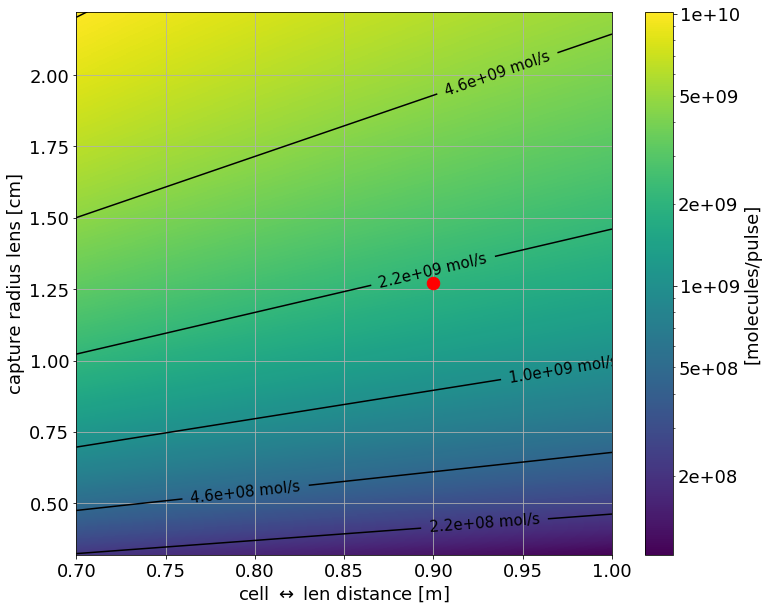

In [23]:
from matplotlib import ticker
from matplotlib.colors import LogNorm
from matplotlib.ticker import LogFormatterSciNotation, LogFormatter

class MF(LogFormatter):
    def set_locs(self, locs=None):
        self._sublabels = set([1,2,5,10])

Z = molecules_pulse
fig, ax = plt.subplots(figsize = (12,10))

pcm = ax.pcolormesh(X,Y*1e2, Z, norm = LogNorm(vmin=Z.min(), vmax=Z.max()))
cbar = fig.colorbar(pcm, format = MF())
cbar.ax.yaxis.set_minor_formatter(MF())


CS = ax.contour(X,Y*1e2,Z, colors = 'k', levels = np.logspace(np.floor(np.log10(Z.min())), np.ceil(np.log10(Z.max())), 4+3*2))
ax.clabel(CS, fontsize=15, inline=1,fmt = r'%.1e mol/s')
ax.plot(0.9, 0.0254/2*1e2, 'r.', ms = 25)

ax.set_xlabel(r'cell $\leftrightarrow$ len distance [m]')
ax.set_ylabel('capture radius lens [cm]')
cbar.ax.set_ylabel('[molecules/pulse]')
set_fontsize(ax, 18)
set_fontsize(cbar.ax, 18)

ax.grid(True)

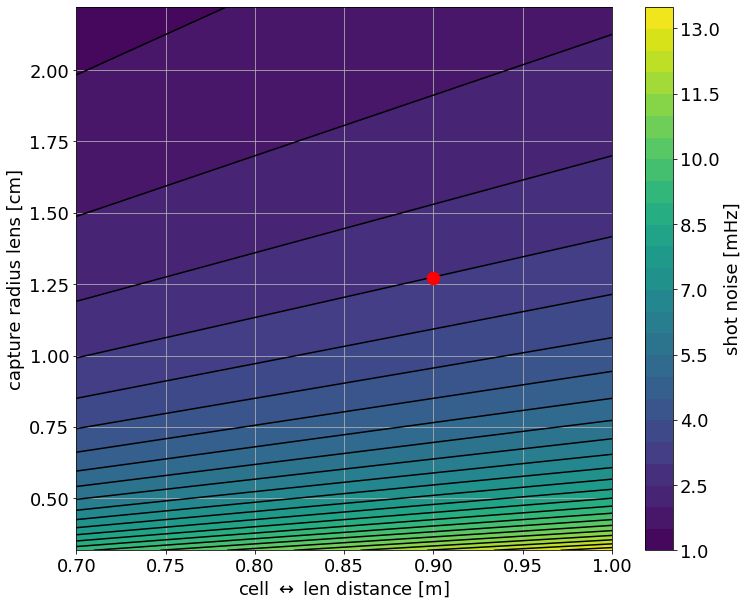

In [24]:
fig, ax = plt.subplots(figsize = (12,10))

Z = 1e3*shot_noise_func(dF0, molecules_pulse, molecules_pulse, Td)
pcm = ax.contourf(X,Y*1e2, Z, levels = 25)
cbar = fig.colorbar(pcm)

ax.contour(X,Y*1e2, Z, levels = 25, colors = 'k')

ax.plot(0.9, 0.0254/2*1e2, 'r.', ms = 25)

ax.set_xlabel(r'cell $\leftrightarrow$ len distance [m]')
ax.set_ylabel('capture radius lens [cm]')
cbar.ax.set_ylabel('shot noise [mHz]')
set_fontsize(ax, 18)
set_fontsize(cbar.ax, 18)

ax.grid(True)

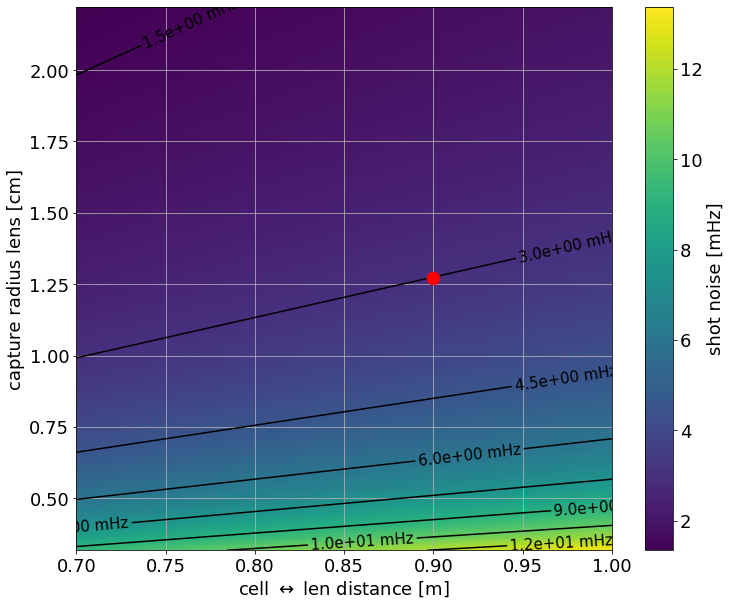

In [25]:
fig, ax = plt.subplots(figsize = (12,10))

Z = 1e3*shot_noise_func(dF0, molecules_pulse, molecules_pulse, Td)
pcm = ax.pcolormesh(X,Y*1e2, Z)
cbar = fig.colorbar(pcm)

CS = ax.contour(X,Y*1e2, Z, levels = 10, colors = 'k')
ax.clabel(CS, fontsize=15, inline=1,fmt = r'%.1e mHz')

ax.plot(0.9, 0.0254/2*1e2, 'r.', ms = 25)

ax.set_xlabel(r'cell $\leftrightarrow$ len distance [m]')
ax.set_ylabel('capture radius lens [cm]')
cbar.ax.set_ylabel('shot noise [mHz]')
set_fontsize(ax, 18)
set_fontsize(cbar.ax, 18)

ax.grid(True)

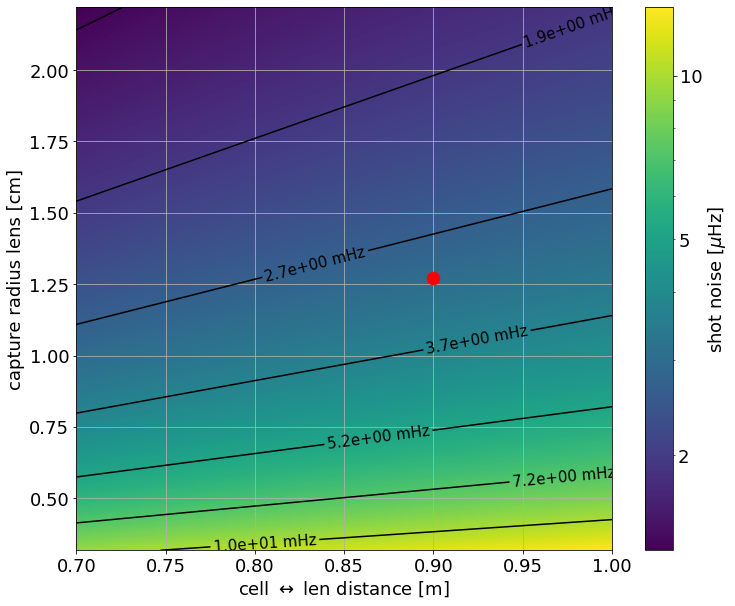

In [26]:
fig, ax = plt.subplots(figsize = (12,10))

Z = 1e3*shot_noise_func(dF0, molecules_pulse, molecules_pulse, Td)

pcm = ax.pcolormesh(X,Y*1e2, Z, norm = LogNorm(vmin=Z.min(), vmax=Z.max()))
cbar = fig.colorbar(pcm, format = MF())
cbar.ax.yaxis.set_minor_formatter(MF())

CS = ax.contour(X,Y*1e2, Z, levels = np.logspace(-1,2,4+3*6), colors = 'k', norm = LogNorm())
ax.clabel(CS, fontsize=15, inline=1,fmt = r'%.1e mHz')

set_fontsize(ax, 15)
set_fontsize(cbar.ax, 15)

ax.plot(0.9, 0.0254/2*1e2, 'r.', ms = 25) 

ax.set_xlabel(r'cell $\leftrightarrow$ len distance [m]')
ax.set_ylabel('capture radius lens [cm]')
cbar.ax.set_ylabel(r'shot noise [$\mu$Hz]')
set_fontsize(ax, 18)
set_fontsize(cbar.ax, 18)

ax.grid(True)

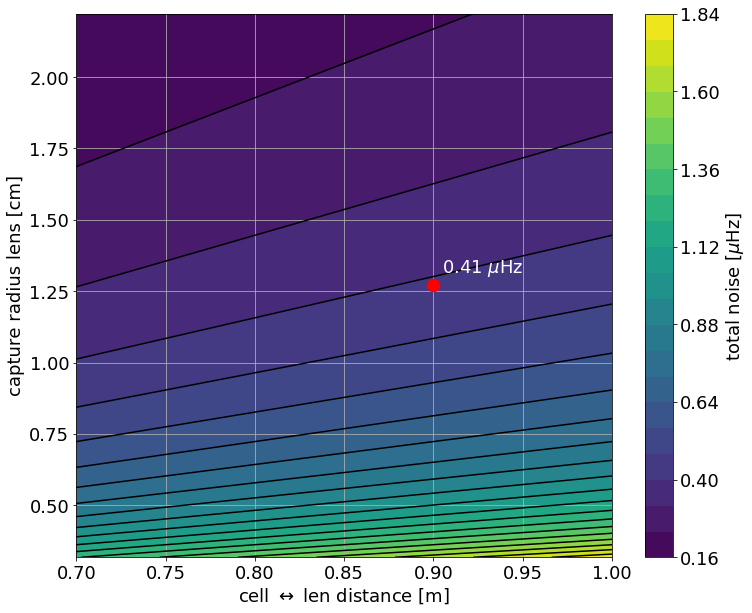

In [27]:
fig, ax = plt.subplots(figsize = (12,10))

Z = 1e6*total_noise_func(dF0, molecules_pulse, molecules_pulse, Td, measurements)
pcm = ax.contourf(X,Y*1e2, Z, levels = 25)
cbar = fig.colorbar(pcm)

ax.contour(X,Y*1e2, Z, levels = 25, colors = 'k')

ax.plot(0.9, 0.0254/2*1e2, 'r.', ms = 25) 

ax.set_xlabel(r'cell $\leftrightarrow$ len distance [m]')
ax.set_ylabel('capture radius lens [cm]')
cbar.ax.set_ylabel(r'total noise [$\mu$Hz]')
set_fontsize(ax, 18)
set_fontsize(cbar.ax, 18)

ax.text(0.9+0.005, 0.0254/2*1e2+0.025, f"{shot_noise/(np.sqrt(measurements))*1e6:.2f} $\mu$Hz", fontsize=18,
        verticalalignment='bottom', horizontalalignment='left', color = 'w')
ax.grid(True)

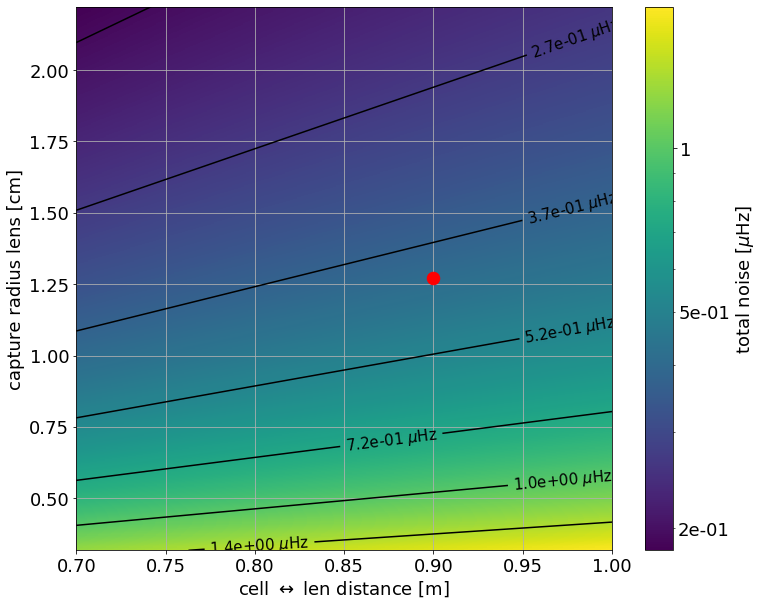

In [28]:
fig, ax = plt.subplots(figsize = (12,10))

Z = 1e6*total_noise_func(dF0, molecules_pulse, molecules_pulse, Td, measurements)

pcm = ax.pcolormesh(X,Y*1e2, Z, norm = LogNorm(vmin=Z.min(), vmax=Z.max()))
cbar = fig.colorbar(pcm, format = MF())
cbar.ax.yaxis.set_minor_formatter(MF())

CS = ax.contour(X,Y*1e2, Z, levels = np.logspace(-1,2,4+3*6), colors = 'k', norm = LogNorm())
ax.clabel(CS, fontsize=15, inline=1,fmt = r'%.1e $\mu$Hz')

set_fontsize(ax, 15)
set_fontsize(cbar.ax, 15)

ax.plot(0.9, 0.0254/2*1e2, 'r.', ms = 25) 

ax.set_xlabel(r'cell $\leftrightarrow$ len distance [m]')
ax.set_ylabel('capture radius lens [cm]')
cbar.ax.set_ylabel(r'total noise [$\mu$Hz]')
set_fontsize(ax, 18)
set_fontsize(cbar.ax, 18)

ax.grid(True)